# Decision Trees
A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. <br>
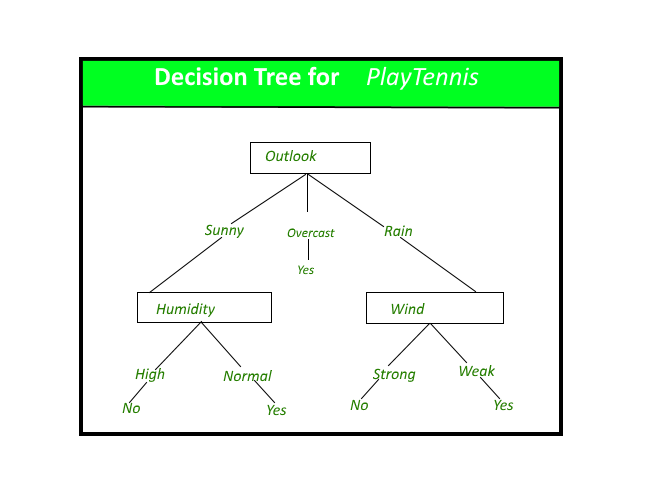

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Position_Salaries.csv')

x = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [14]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)
scale_y = StandardScaler()
y_train = scale_y.fit_transform(y_train)

## Training

In [6]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x,y)

DecisionTreeRegressor(random_state=0)

[Text(0.703125, 0.9285714285714286, 'X[0] <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(0.53125, 0.7857142857142857, 'X[0] <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(0.375, 0.6428571428571429, 'X[0] <= 4.5\nsquared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(0.25, 0.5, 'X[0] <= 3.5\nsquared_error = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(0.1875, 0.35714285714285715, 'X[0] <= 2.5\nsquared_error = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(0.125, 0.21428571428571427, 'X[0] <= 1.5\nsquared_error = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(0.0625, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.1875, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(0.25, 0.21428571428571427, 'squared_error = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(0.3125, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 80000.0')

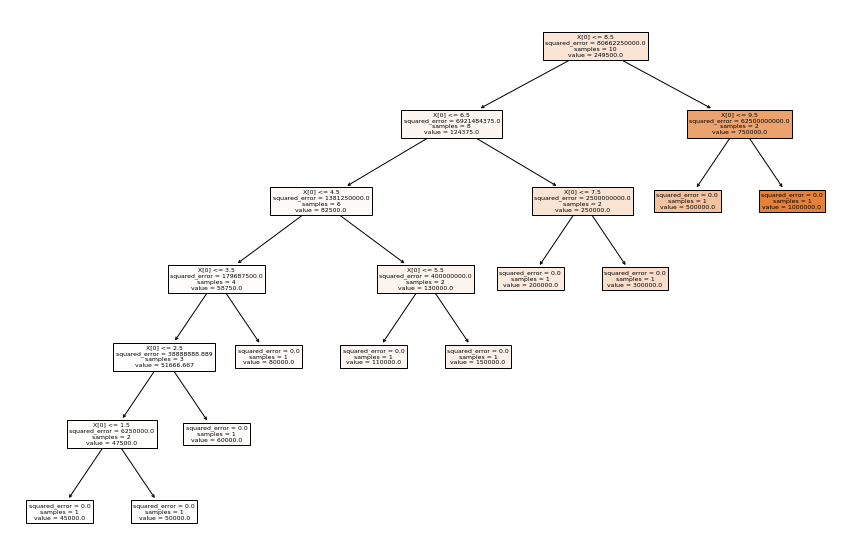

In [7]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [8]:
y_pred = model.predict([[6.5]])
y_pred

array([150000.])

In [10]:
model_mse = mean_squared_error(y_test, model.predict(x_test))
print('Mean Squared Error:\t',math.sqrt(model_mse))
print("R squared value\t\t",model.score(x,y))

Mean Squared Error:	 321908.37205639743
R squared value		 1.0


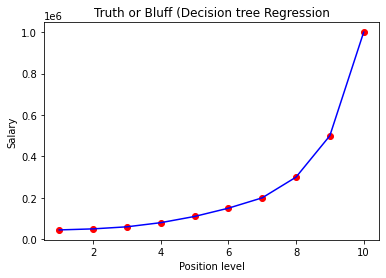

In [13]:
plt.scatter(x,y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Truth or Bluff (Decision tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()